In [ ]:
### imports

import os
import numpy as np
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from osgeo import gdal

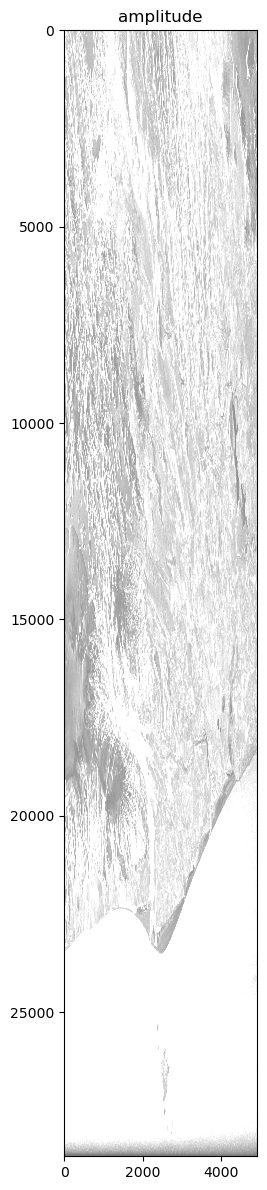

In [5]:

ds = gdal.Open("reference_preprocess_slc/reference_preprocess.slc", gdal.GA_ReadOnly)
# extract a part of the SLC to display
x0 = 0
y0 = 0
x_offset = 4913
y_offset = 28672
slc = ds.GetRasterBand(1).ReadAsArray(x0, y0, x_offset, y_offset)
ds = None

fig = plt.figure(figsize=(14, 12))

# display amplitude of the slc
fr = fig.add_subplot(1,1,1)
fr.imshow(np.abs(slc), vmin = -2, vmax=2, cmap='gray')
fr.set_title("amplitude")

fig.tight_layout()


plt.show()

slc = None

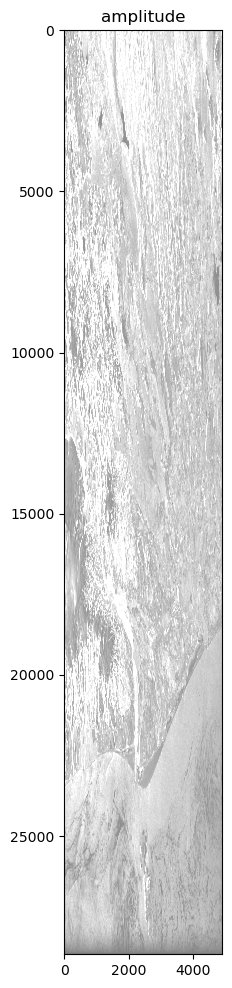

In [5]:
ds = gdal.Open("coregisteredSlc/refined_coreg.slc", gdal.GA_ReadOnly)
slc = ds.GetRasterBand(1).ReadAsArray(0, 0, 4913, 28672)
ds = None

fig = plt.figure(figsize=(14, 12))

ax = fig.add_subplot(1,1,1)
ax.imshow(np.abs(slc), vmin = -2, vmax=2, cmap='gray')
ax.set_title("amplitude")

slc = None

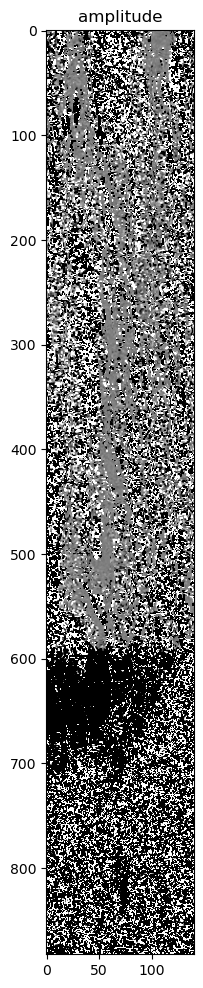

In [4]:
ds = gdal.Open("denseOffsets/denseOffsets.bil", gdal.GA_ReadOnly)
slc = ds.GetRasterBand(1).ReadAsArray(0, 0, 141, 883)
ds = None

fig = plt.figure(figsize=(14, 12))

ax = fig.add_subplot(1,1,1)
ax.imshow(slc, vmin = -2, vmax=2, cmap='gray')
ax.set_title("amplitude")

fig.savefig("denseOffsets_test.png", dpi=300)

slc = None

NameError: name 'show' is not defined

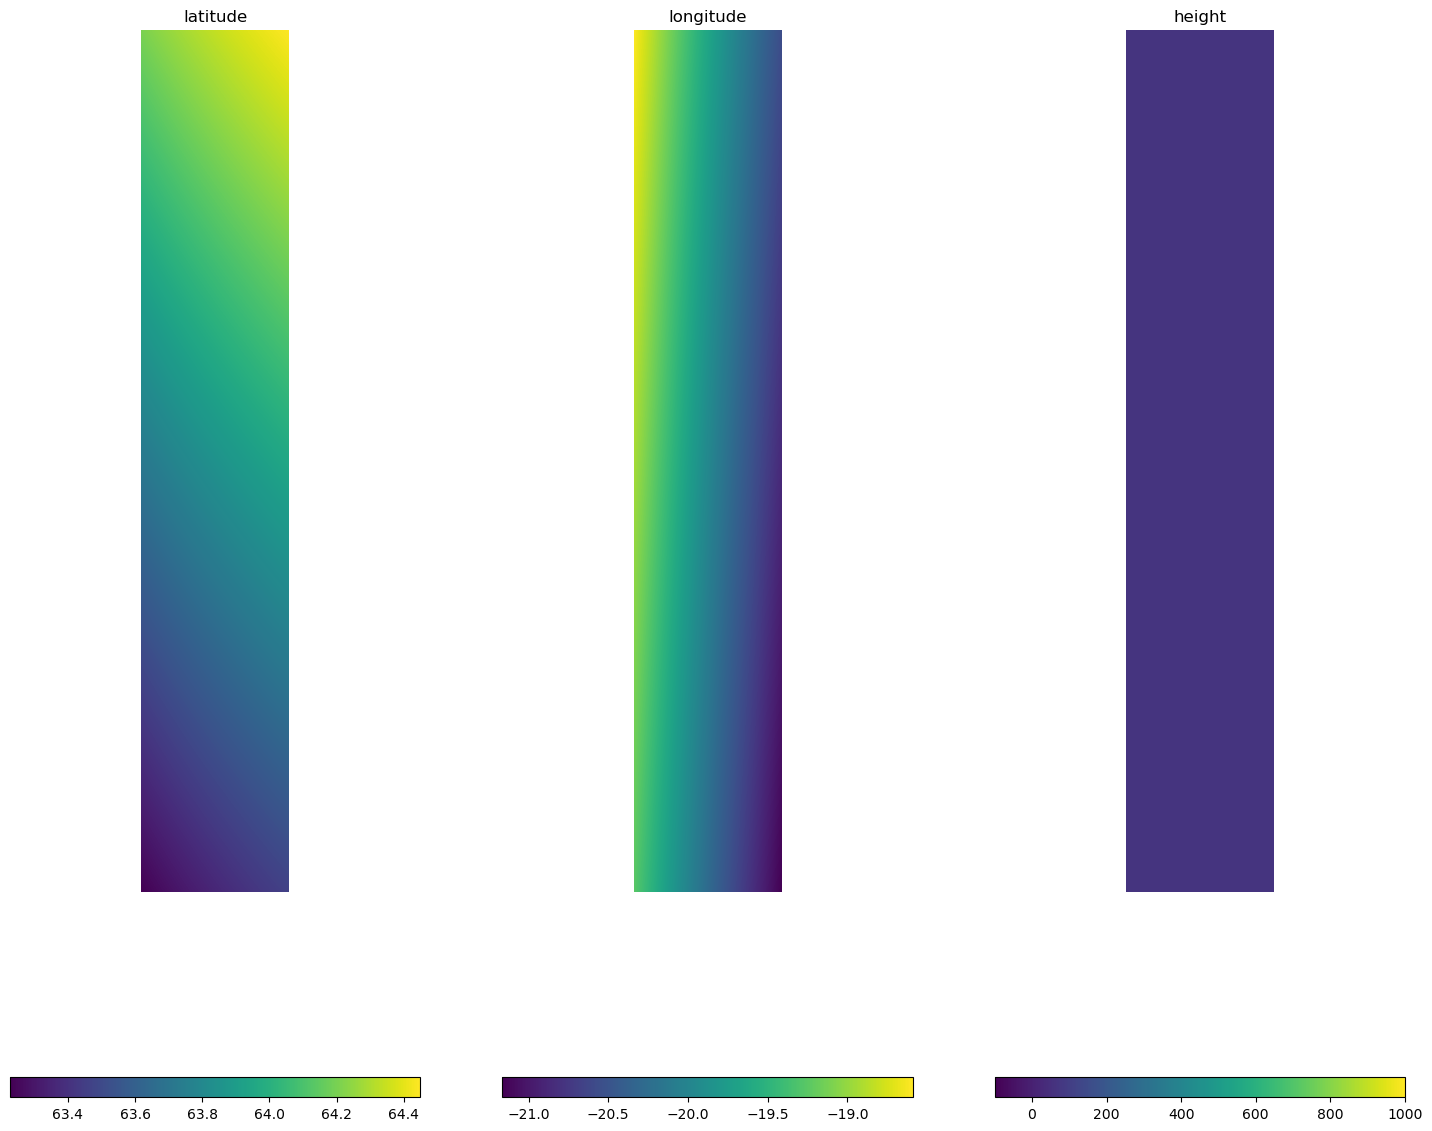

In [6]:
width=4913
height=28672

# Read a bounding box of latitude
ds = gdal.Open('geometry/lat.rdr.full', gdal.GA_ReadOnly)
lat = ds.GetRasterBand(1).ReadAsArray(0,0,width, height)
ds = None

# Read a bounding box of longitude
ds = gdal.Open('geometry/lon.rdr.full', gdal.GA_ReadOnly)
lon = ds.GetRasterBand(1).ReadAsArray(0,0,width, height)
ds = None|

# Read a bounding box of height
ds = gdal.Open('geometry/z.rdr.full', gdal.GA_ReadOnly)
hgt = ds.GetRasterBand(1).ReadAsArray(0,0,width, height)
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(lat)
ax.set_title("latitude")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')


ax = fig.add_subplot(1,3,2)
cax=ax.imshow(lon)
ax.set_title("longitude")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax=ax.imshow(hgt, vmin = -100, vmax=1000)
ax.set_title("height")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

show()

lat = None
lon = None
hgt = None